## Canonical Problem 1:  Elastically supported foundation pile

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px"\>
</h1>
<h2 style="height: 10px">
</h2>

*CIEM0000 Unit2: Interdisciplinary Mechanics*

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider


<center>
<img src="images/CP1.png" alt="layout" width="15%">
</center>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1</b> 

The equation of motion reads as:

$$
EA\frac{\mathrm{d}^2u}{\mathrm{d}z^2}=ku(z)
$$

with the following boundary conditions:

$$
EA\frac{\mathrm{d}u}{\mathrm{d}z} =-F_0\quad \text{ at } z=0
$$

$$
EA\frac{\mathrm{d}u}{\mathrm{d}z} =-Ku\quad \text{ at } z=L
$$


</p>
</div>



In [4]:
# Define the symbols and functions
z, L, k, EA, F0, K = sym.symbols('z L k EA F0 K')
u = sym.Function('u')(z)

# Define lambda
lambda_ = sym.sqrt(k / EA)

# Define the differential equation
diffeq = sym.Eq(EA * u.diff(z, 2), k * u)

# Solve the differential equation
u_general = sym.dsolve(diffeq, u)
A, B = sym.symbols('C1 C2')
u_general = u_general.rhs

# Define the boundary conditions
du_dz = u_general.diff(z)
bc1 = sym.Eq(EA * du_dz.subs(z, 0), -F0)
bc2 = sym.Eq(EA * du_dz.subs(z, L), -K * u_general.subs(z, L))

# Solve for the constants A and B
constants = sym.solve([bc1, bc2], (A, B))

# Substitute the constants back into the general solution
u_solution = u_general.subs(constants)

# Optional: Simplify the solution for better readability
u_solution_simplified = sym.simplify(u_solution)
display(u_solution_simplified)

# Compute the derivative of the solution
du_solution_simplified = sym.simplify(u_solution_simplified.diff(z))

F0*((EA*sqrt(k/EA) - K)*(EA*k*sqrt(k/EA)*exp(4*L*sqrt(k/EA)) - 2*EA*k*sqrt(k/EA)*exp(2*L*sqrt(k/EA)) + EA*k*sqrt(k/EA) + K**2*sqrt(k/EA)*exp(4*L*sqrt(k/EA)) + 2*K**2*sqrt(k/EA)*exp(2*L*sqrt(k/EA)) + K**2*sqrt(k/EA) + 2*K*k*exp(4*L*sqrt(k/EA)) - 2*K*k)*exp(2*z*sqrt(k/EA)) + (K*sqrt(k/EA)*exp(2*L*sqrt(k/EA)) + K*sqrt(k/EA) + k*exp(2*L*sqrt(k/EA)) - k)*(2*EA*K*sqrt(k/EA)*exp(2*L*sqrt(k/EA)) + EA*k*exp(2*L*sqrt(k/EA)) - EA*k + K**2*exp(2*L*sqrt(k/EA)) + K**2)*exp(2*L*sqrt(k/EA)))*exp(-z*sqrt(k/EA))/(EA*(K*sqrt(k/EA)*exp(2*L*sqrt(k/EA)) + K*sqrt(k/EA) + k*exp(2*L*sqrt(k/EA)) - k)*(EA*k*sqrt(k/EA)*exp(4*L*sqrt(k/EA)) - 2*EA*k*sqrt(k/EA)*exp(2*L*sqrt(k/EA)) + EA*k*sqrt(k/EA) + K**2*sqrt(k/EA)*exp(4*L*sqrt(k/EA)) + 2*K**2*sqrt(k/EA)*exp(2*L*sqrt(k/EA)) + K**2*sqrt(k/EA) + 2*K*k*exp(4*L*sqrt(k/EA)) - 2*K*k))

In [5]:
# Define N(z)
N_z = EA * du_solution_simplified

# Create a lambda function from the N(z) expression
N_func = sym.lambdify((z, L, k, EA, F0, K), N_z, 'numpy')

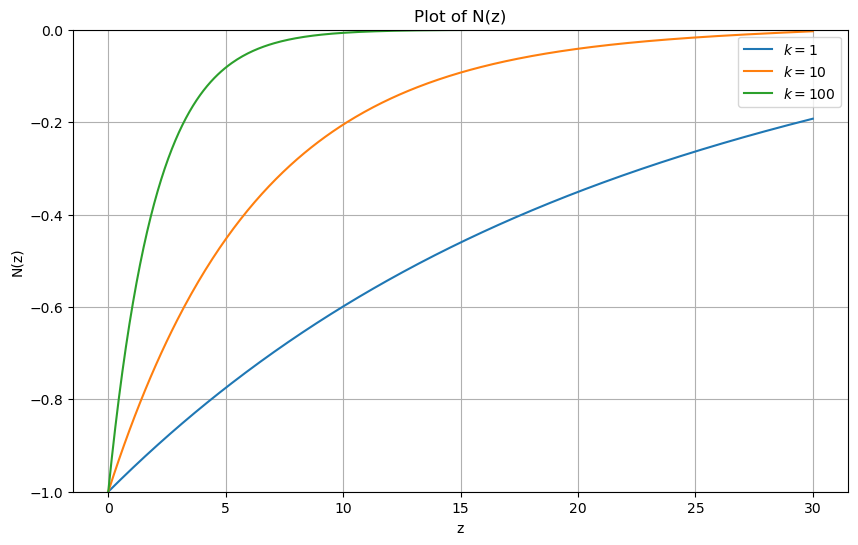

In [10]:
# Example parameters
L_val = 30
k_val = 1
k_val_medium = 10
k_val_high = 100
EA_val = 400
F0_val = 30e3
K_val = 15.0

# Generate z values
z_vals = np.linspace(0, L_val, 400)

# Compute N(z) values
N_vals = N_func(z_vals, L_val, k_val, EA_val, F0_val, K_val)
N_vals_medium = N_func(z_vals, L_val, k_val_medium, EA_val, F0_val, K_val)
N_vals_high = N_func(z_vals, L_val, k_val_high, EA_val, F0_val, K_val)

# Save data points to files
data_low = np.column_stack((z_vals, N_vals / F0_val))
data_medium = np.column_stack((z_vals, N_vals_medium / F0_val))
data_high = np.column_stack((z_vals, N_vals_high / F0_val))
np.savetxt("Nz_data_low.txt", data_low, header="z N(z)")
np.savetxt("Nz_data_medium.txt", data_medium, header="z N(z)")
np.savetxt("Nz_data_high.txt", data_high, header="z N(z)")


# Plot N(z)
plt.figure(figsize=(10, 6))
plt.plot(z_vals, N_vals/F0_val, label=r'$k=1$')
plt.plot(z_vals, N_vals_medium/F0_val, label=r'$k = 10$')
plt.plot(z_vals, N_vals_high/F0_val, label=r'$k = 100$')
plt.xlabel('z')
plt.ylabel('N(z)')
plt.ylim(-1.0,0)
plt.title('Plot of N(z)')
plt.legend()
plt.grid(True)
plt.show()